In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [2]:
model_3_data = pd.read_csv('data/model_2_data.csv')

In [3]:
model_3_data.head()

price  sqft_living  sqft_lot  waterfront  Season_Summer  Season_Fall  \
0  221900         1180      5650           0              0            1   
1  538000         2570      7242           0              0            0   
2  180000          770     10000           0              0            0   
3  604000         1960      5000           0              0            0   
4  510000         1680      8080           0              0            0   

   Season_Winter  Bedrooms_2  Bedrooms_3  Bedrooms_4  ...  fifth_chunk  \
0              0           0           1           0  ...            0   
1              1           0           1           0  ...            0   
2              1           1           0           0  ...            0   
3              1           0           0           1  ...            0   
4              1           0           1           0  ...            0   

   renovation_10  Section_2  Section_3  Section_4  Section_5  Section_6  \
0              0          0          0          1          0          0   
1              0          0          0          0          0          0   
2              0          1          0          0          0          0   
3              0          0          0          1          0          0   
4              0          1          0          0          0          0   

   Section_7  Section_8  Section_9  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          0          0          0  
4          0          0          0  

[5 rows x 39 columns]

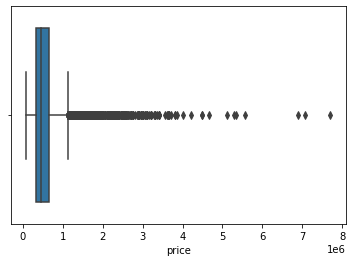

In [4]:
ax = sns.boxplot(x=model_3_data.price)

In [5]:
sev_fiv_percentile = np.percentile(model_3_data.price, 75)
twe_fiv_percentile = np.percentile(model_3_data.price, 25)
price_iqr = sev_fiv_percentile - twe_fiv_percentile

In [6]:
## Removes 1119 houses with price outliers
model_3_data = model_3_data.loc[(model_3_data.price <= sev_fiv_percentile + 1.5*price_iqr)
                              & (model_3_data.price >= twe_fiv_percentile - 1.5*price_iqr)]

<ipython-input-7-b5e1074264bc>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  model_3_data[['sqft_living', 'sqft_lot']].hist(ax=ax);


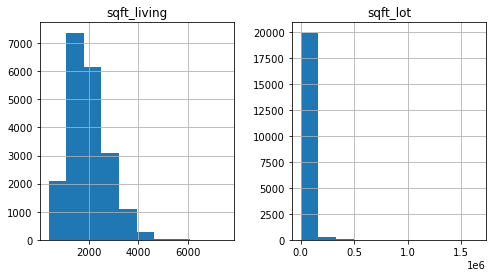

In [7]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
model_3_data[['sqft_living', 'sqft_lot']].hist(ax=ax);

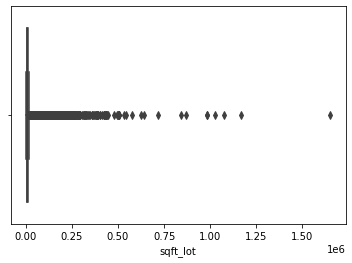

In [8]:
ax = sns.boxplot(x=model_3_data.sqft_lot)

In [9]:
sev_fiv_percentile_lot = np.percentile(model_3_data.sqft_lot, 75)
twe_fiv_percentile_lot = np.percentile(model_3_data.sqft_lot, 25)
sqft_lot_iqr = sev_fiv_percentile_lot - twe_fiv_percentile_lot

In [10]:
## Removes 2191 houses with sqft_lot outliers
model_3_data = model_3_data.loc[(model_3_data.sqft_lot <= sev_fiv_percentile_lot + 1.5*sqft_lot_iqr)
                              & (model_3_data.sqft_lot >= twe_fiv_percentile_lot - 1.5*sqft_lot_iqr)]

<ipython-input-11-383805a4f524>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  model_3_data[['sqft_living', 'sqft_lot']].hist(ax=ax);


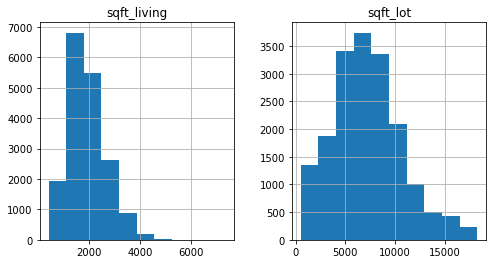

In [11]:
fig2 = plt.figure(figsize=(8,4))
ax = fig2.gca()
model_3_data[['sqft_living', 'sqft_lot']].hist(ax=ax);

In [12]:
target_variable = 'price'
input_variables = model_3_data.drop('price', axis=1).columns
formula = target_variable + '~' + '+'.join(input_variables)

In [13]:
model_3 = ols(formula=formula, data=model_3_data).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     934.0
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:50:55   Log-Likelihood:            -2.3618e+05
No. Observations:               18001   AIC:                         4.724e+05
Df Residuals:                   17964   BIC:                         4.727e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.035e+05   1.15e+04     35.180      0.000    3.81e+05    4.26e+05
sqft_living           168.1892      2.066     81.408      0.000     164.140     172.239
sqft_lot               -1.7934      0.358     -5.003      0.000      -2.496      -1.091
waterfront            1.79e+05   2.06e+04      8.675      0.000    1.39e+05    2.19e+05
Season_Summer       -1.655e+04   2346.739     -7.053      0.000   -2.12e+04    -1.2e+04
Season_Fall         -2.467e+04   2484.289     -9.932      0.000   -2.95e+04   -1.98e+04
Season_Winter       -2.426e+04   2720.250     -8.920      0.000   -2.96e+04   -1.89e+04
Bedrooms_2           7337.5216   1.04e+04      0.705      0.481   -1.31e+04    2.77e+04
Bedrooms_3           -627.6952   1.04e+04     -0.061      0.952   -2.09e+04    1.97e+04
Bedrooms_4          -1.553e+04   1.06e+04     -1.465      0.143   -3.63e+04    5244.954
Bedrooms_5          -4.845e+04   1.12e+04     -4.320      0.000   -7.04e+04   -2.65e+04
Bedrooms_6_up       -9.417e+04   1.35e+04     -6.977      0.000   -1.21e+05   -6.77e+04
Bathrooms_2          8658.0335   2575.265      3.362      0.001    3610.266    1.37e+04
Bathrooms_3          3.601e+04   4477.861      8.042      0.000    2.72e+04    4.48e+04
Bathrooms_4          4.049e+04    1.2e+04      3.382      0.001     1.7e+04     6.4e+04
Bathrooms_5_up      -7.944e+04   3.57e+04     -2.226      0.026   -1.49e+05   -9500.345
Floors_2             3.153e+04   2858.654     11.030      0.000    2.59e+04    3.71e+04
Floors_3             4.012e+04   6213.555      6.457      0.000    2.79e+04    5.23e+04
View_1               1.413e+04   8437.682      1.675      0.094   -2406.381    3.07e+04
View_2              -1.045e+05   4043.628    -25.852      0.000   -1.12e+05   -9.66e+04
Condition_Fair      -2.732e+04   1.11e+04     -2.461      0.014   -4.91e+04   -5557.527
Condition_Good       2.744e+04   2329.926     11.777      0.000    2.29e+04     3.2e+04
Condition_Poor      -1.164e+05   2.72e+04     -4.285      0.000    -1.7e+05   -6.32e+04
Condition_Very_Good  5.273e+04   3655.328     14.425      0.000    4.56e+04    5.99e+04
Grade_Above_Average -6.646e-08   1.99e-08     -3.348      0.001   -1.05e-07   -2.76e-08
Grade_High_Quality   -3.36e-08      1e-08     -3.355      0.001   -5.32e-08    -1.4e-08
second_chunk        -4.435e+04   3725.030    -11.907      0.000   -5.17e+04   -3.71e+04
third_chunk         -8.407e+04   3712.507    -22.645      0.000   -9.13e+04   -7.68e+04
fourth_chunk        -9.624e+04   4172.531    -23.065      0.000   -1.04e+05   -8.81e+04
fifth_chunk         -8.945e+04   4607.056    -19.417      0.000   -9.85e+04   -8.04e+04
renovation_10        7.365e+04   8586.748      8.578      0.000    5.68e+04    9.05e+04
Section_2            1.222e+04   3178.242      3.845      0.000    5990.236    1.84e+04
Sec

 #### Assumption of Normality<br>&emsp;(for Model_3)

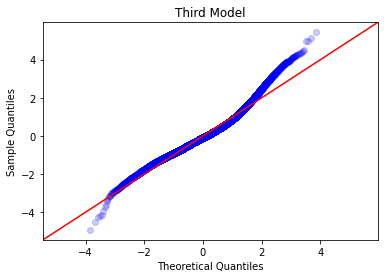

In [14]:
residuals = model_3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45', alpha=0.2)
plt.title('Third Model', size=12);

#### Assumption of Homoscedasticity<br>&emsp;(for Model_3)

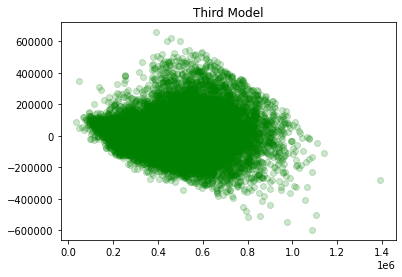

In [15]:
fig1,ax1 = plt.subplots()
ax1.scatter(x=model_3.predict(), y=residuals, color='green', alpha=0.2)
plt.title('Third Model', size=12);

In [16]:
x_data = model_3_data.drop(['price'], axis=1)
y_data = model_3_data.price

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

In [18]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

y_estimate_train = linreg.predict(X_train)
y_estimate_test = linreg.predict(X_test)

In [19]:
train_rmse = mean_squared_error(Y_train, y_estimate_train, squared=False)
test_rmse = mean_squared_error(Y_test, y_estimate_test, squared=False)
print(train_rmse, test_rmse)

120154.72350157917 122190.1094198686


In [20]:
model_3_data.to_csv('data/model_3_data.csv', index=False)